### 1. 모듈 import

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

### 2. 데이터 준비

In [4]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

### 3. 데이터 이해하기

In [5]:
wine_data = wine.data # 178 X 13
wine_label = wine.target # 178 labels

In [6]:
print(wine_data.shape)

(178, 13)


In [7]:
wine_data[0] 

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [8]:
print(wine_label.shape)
wine_label[:20]

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Label 값이 1, 0 ,2 순으로 많다. 

In [9]:
import collections
collections.Counter(wine_label)

Counter({0: 59, 1: 71, 2: 48})

#### feature : wine 성분

In [10]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [11]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### 4. Train/Test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size = 0.2, random_state = 42)

print("Train set(N) : {} \nTest set(N) : {}".format(len(X_train),len(X_test)))

Train set(N) : 142 
Test set(N) : 36


### 5. 다양한 모델로 학습해보기.

- Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



- Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



- SVM

In [16]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



- SGD Classifier

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train,y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.54      1.00      0.70        14
           2       0.00      0.00      0.00         8

    accuracy                           0.67        36
   macro avg       0.51      0.57      0.51        36
weighted avg       0.60      0.67      0.60        36



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 5. 정리

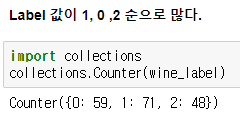

- 와인의 성분을 가지고 어디 지방에서 생산된 와인인지를 판별하는 모델을 Deceision-Tree, Random-Forest, SVM, SGD-Classifier, Logistic Regression 기법을 이용해 구성했다.

- 데이터 분포가 어느 정도 고르기 때문에 모델 성능 평가에 Accuracy, Precison , recall 을 모두 고려한다. 이때 Precision과 recall간의 큰 차이가 없기 때문에 weighted avg f1-score를 통해 확인한다.

|지표|Deceision-Tree|Random-Forest|SVM|SGD-Classifier|Logistic Regression|
|:------|:------|:------|:------|:------|:------|
|Accuracy|0.94|**1.00**|0.81|0.67|0.97|
|f-1 score|0.94|**1.00**|0.80|0.60|0.97|

 - Random-Forest 모델이 Accuuracy와 f-1 socre가 모두 높기 때문에 가장 적합한 모델이라고 생각한다.